In [ ]:
import io
import requests
import logging
import itertools
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (mean_squared_error, r2_score,
                             confusion_matrix, ConfusionMatrixDisplay)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Restrict tensorflow output to errors
logging.getLogger('tensorflow').setLevel(logging.ERROR)

# Make this notebook's output stable across runs
random_state = 100
np.random.seed(random_state)
tf.random.set_seed(random_state)

# Plot formatting
%matplotlib inline
sns.set()
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
# Load fashion MNIST data
fashion_mnist = keras.datasets.fashion_mnist

((X_train_full, y_train_full),
    (X_test, y_test)) = fashion_mnist.load_data() 

X_valid = X_train_full[:5000] / 255.0
X_train = X_train_full[5000:] / 255.0
y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]
X_test = X_test / 255.0 

class_names = [
    'T-Shirt or Top', 'Trouser', 'Pullover', 
    'Dress', 'Coat', 'Sandal', 'Shirt', 
    'Sneaker', 'Bag', 'Ankle Boot'
]

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Show raw data
X_train[0][0,:]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00392157,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

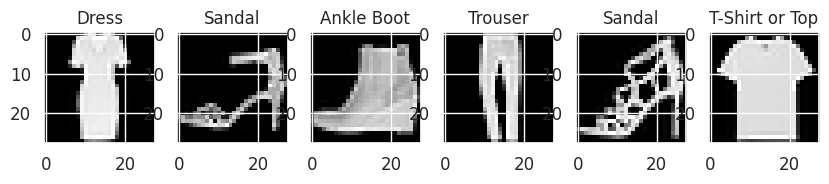

In [ ]:
# Output random training instances as images
fig, ax = plt.subplots(1, 6, figsize=(10, 4))
locs = np.random.randint(0, 5000, 6)
for i, a in enumerate(ax):
    a.imshow(X_train[locs[i]], cmap='gray')
    a.set_title(class_names[y_train[locs[i]]])

plt.show()

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
# Create a model with two hidden layers
tf.keras.backend.clear_session()

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = X_train[0].shape))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(len(class_names), activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=30, batch_size=32,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7301 - accuracy: 0.7641 - val_loss: 0.5774 - val_accuracy: 0.8026
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4940 - accuracy: 0.8286 - val_loss: 0.4476 - val_accuracy: 0.8470
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4500 - accuracy: 0.8422 - val_loss: 0.4174 - val_accuracy: 0.8522
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4224 - accuracy: 0.8516 - val_loss: 0.4019 - val_accuracy: 0.8642
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4014 - accuracy: 0.8591 - val_loss: 0.4117 - val_accuracy: 0.8528
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3852 - accuracy: 0.8643 - val_loss: 0.3804 - val_accuracy: 0.8666
Epoch 7/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3718 - accuracy: 0.8688 - val_loss: 0.3635 - val_accuracy:

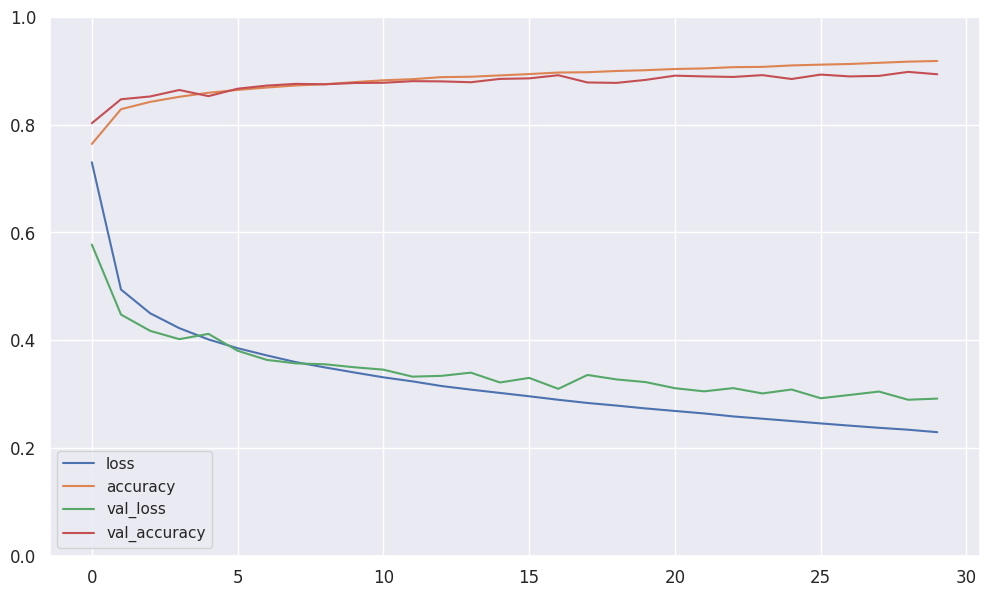

In [ ]:
# Chart the learning process
pd.DataFrame(history.history).plot(figsize=(12, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()



---



**1A. Creating a Model with 50 neurons in the lower hidden layer and 20 in the upper hidden layer.**


---



In [ ]:
# Create a model with two hidden layers
tf.keras.backend.clear_session()

model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape = X_train[0].shape))
model_A.add(keras.layers.Dense(50, activation='relu'))
model_A.add(keras.layers.Dense(20, activation='relu'))
model_A.add(keras.layers.Dense(len(class_names), activation='softmax'))

model_A.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 20)                1020      
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
Total params: 40,480
Trainable params: 40,480
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit the model
model_A.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd', metrics=['accuracy'])

history_A = model_A.fit(X_train, y_train, epochs=30, batch_size=32,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.8452 - accuracy: 0.7123 - val_loss: 0.5822 - val_accuracy: 0.7976
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5389 - accuracy: 0.8122 - val_loss: 0.4883 - val_accuracy: 0.8324
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4848 - accuracy: 0.8304 - val_loss: 0.4501 - val_accuracy: 0.8438
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4553 - accuracy: 0.8393 - val_loss: 0.4341 - val_accuracy: 0.8510
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4334 - accuracy: 0.8462 - val_loss: 0.4458 - val_accuracy: 0.8374
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4175 - accuracy: 0.8526 - val_loss: 0.4125 - val_accuracy: 0.8580
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4032 - accuracy: 0.8571 - val_loss: 0.3906 - val_accuracy:

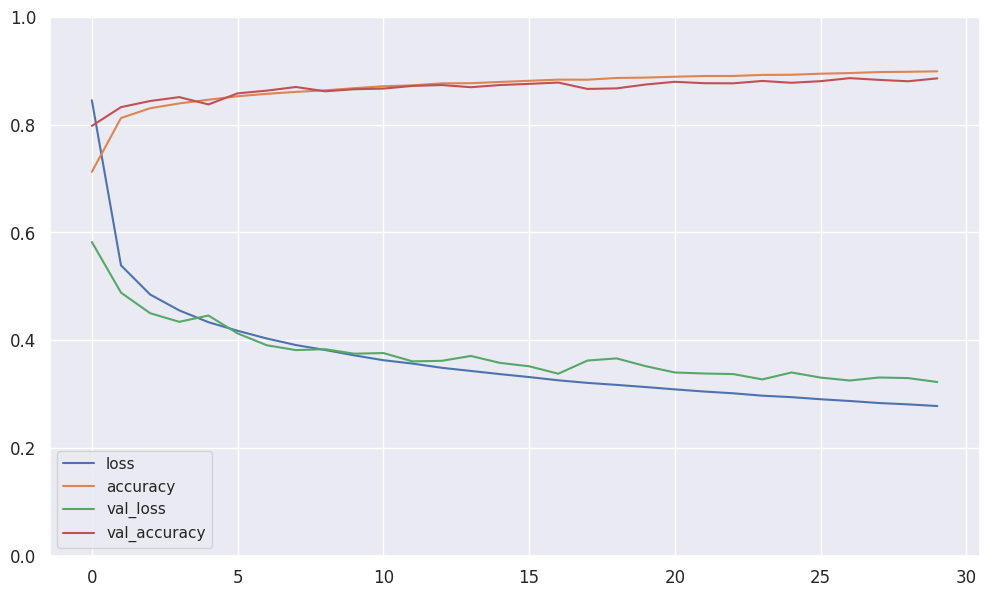

In [ ]:
# Chart the learning process
pd.DataFrame(history_A.history).plot(figsize=(12, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Reducing the number of neurons in the lower layer from 300 to 50 and 100 to 20 in the upper layer decreases the overall performance of the model. While the runtime of each individual epoch and batch decreases by almost half due to this modification, the original model achieves the results similar to the modified model at the 19th epoch, requiring 10 less iterations.

Loss increases by 0.0485 showing that the modified model has on average a greater difference between the predicted and actual values. Additionally, the accuracy of the model decreases indicating that the modified model is worse at accurately predicting the data in the training set.

The increase in val_loss and decrease in val_accuracy of the new model display the relatively worse performance of the model on the validation data when compared to the original model. It can be stated that the modified model does not perform as well as the original model on the validation dataset by comparing these values. Additionally, the generalization of the model also worsens since the val_accuracy of the modified model decreases, indicating that the new model is worse at predicting new, unseen data than the original model. 

---


1B. Adding a hidden layer with 50 neurons immediately below the output.
**bold text**

---

In [ ]:
tf.keras.backend.clear_session()

model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape = X_train[0].shape))
model_B.add(keras.layers.Dense(300, activation='relu'))
model_B.add(keras.layers.Dense(100, activation='relu'))
model_B.add(keras.layers.Dense(50, activation='relu')) # new hidden layer
model_B.add(keras.layers.Dense(len(class_names), activation='softmax'))

model_B.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
Total params: 271,160
Trainable params: 271,160
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit the model
model_B.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd', metrics=['accuracy'])

history_B = model_B.fit(X_train, y_train, epochs=30, batch_size=32,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7308 - accuracy: 0.7552 - val_loss: 0.6122 - val_accuracy: 0.7938
Epoch 2/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4842 - accuracy: 0.8301 - val_loss: 0.4370 - val_accuracy: 0.8482
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4356 - accuracy: 0.8460 - val_loss: 0.4086 - val_accuracy: 0.8554
Epoch 4/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4049 - accuracy: 0.8569 - val_loss: 0.3930 - val_accuracy: 0.8614
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3825 - accuracy: 0.8635 - val_loss: 0.3997 - val_accuracy: 0.8566
Epoch 6/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3654 - accuracy: 0.8699 - val_loss: 0.3714 - val_accuracy: 0.8682
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3505 - accuracy: 0.8752 - val_loss: 0.3482 - val_accuracy:

Adding a new hidden layer with 50 neurons immediately below the output appears to increase the performance of the model. The runtime of both models is relatively equal, however the modified model performs better in all paramters. 

The loss of the modified model based on the training data decreases, indicating that the new model makes better predictions when compared to the original model. Additionally, there is a noticeable increase in accuracy for the modified model, displaying that the modified model performs better than the original model in accurately predicting the training dataset.

With that being said, this modified model has a similar performance to the original model in terms of the validation data. The val_loss and val_accuracy statistics are in a very small, similar range, showing that this model generalizes about as well as the original model, if not slightly worse when used on the validation data. 

---

**2. CNN for CIFAR-10**

---



In [ ]:
mpl.rc('axes', grid=False)

In [ ]:
# Load CIFAR-10 data
((X_train_full, y_train_full),
 (X_test, y_test)) = keras.datasets.cifar10.load_data()

X_valid = X_train_full[:5000] / 255.0
X_train = X_train_full[5000:] / 255.0
y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]
X_test = X_test / 255.0

image_dims = (32, 32, 3)

class_names_2 = [
    'airplane', 'automobile', 'bird',
    'cat', 'deer', 'dog', 'frog',
    'horse', 'ship', 'truck'
]

170498071/170498071 [==============================] - 4s 0us/step


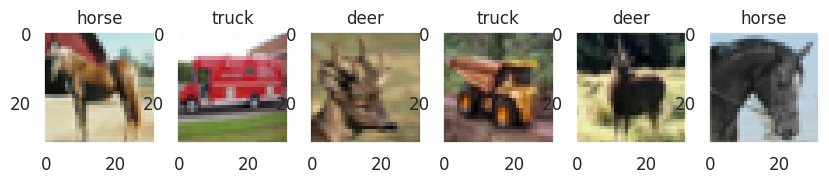

In [ ]:
# Output random training instances as images
fig, ax = plt.subplots(1, 6, figsize=(10, 4))
locs = np.random.randint(0, 5000, 6)
for i, a in enumerate(ax):
    a.imshow(X_train[locs[i]])
    a.set_title(class_names_2[y_train[locs[i]][0]])

plt.show()

In [ ]:
# Define network
tf.keras.backend.clear_session()

model_2 = keras.models.Sequential([ 
    keras.layers.Conv2D(64, 7, activation='relu', padding='same', 
                        input_shape=image_dims),
    keras.layers.MaxPooling2D(2), 
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'), 
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'), 
    keras.layers.MaxPooling2D(2), 
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'), 
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'), 
    keras.layers.MaxPooling2D(2), 
    keras.layers.Flatten(), 
    keras.layers.Dense(128, activation='elu'), 
    keras.layers.Dropout(0.5), 
    keras.layers.Dense(64, activation='elu'), 
    keras.layers.Dropout(0.5), 
    keras.layers.Dense(len(class_names_2), activation='softmax')
]) 


---


**Training Approach**

---



In [ ]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        9472      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 256)         2

In [ ]:
# Fit the model
X_train = X_train.reshape(*X_train.shape, 1)
X_valid = X_valid.reshape(*X_valid.shape, 1)

opt = keras.optimizers.Adam(learning_rate=0.01)
model_2.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

history_2 = model_2.fit(X_train, y_train, epochs=20, batch_size=64,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
704/704 [==============================] - 815s 1s/step - loss: 1.8363 - accuracy: 0.3096 - val_loss: 1.4368 - val_accuracy: 0.4834
Epoch 2/20
704/704 [==============================] - 805s 1s/step - loss: 1.4510 - accuracy: 0.4713 - val_loss: 1.2674 - val_accuracy: 0.5460
Epoch 3/20
704/704 [==============================] - 821s 1s/step - loss: 1.2707 - accuracy: 0.5476 - val_loss: 1.1370 - val_accuracy: 0.5950
Epoch 4/20
704/704 [==============================] - 821s 1s/step - loss: 1.1535 - accuracy: 0.5944 - val_loss: 1.0844 - val_accuracy: 0.6164
Epoch 5/20
704/704 [==============================] - 815s 1s/step - loss: 1.0407 - accuracy: 0.6357 - val_loss: 1.0074 - val_accuracy: 0.6452
Epoch 6/20
704/704 [==============================] - 815s 1s/step - loss: 0.9589 - accuracy: 0.6676 - val_loss: 0.9382 - val_accuracy: 0.6742
Epoch 7/20
704/704 [==============================] - 817s 1s/step - loss: 0.8774 - accuracy: 0.6972 - val_loss: 0.9481 - val_accuracy: 0.6716

Epoch 20 indicates that this model has a fairly decent loss function and 91.36% accuracy, showing that the model fits the training data well. Compartively, it does not fit the validation data as well.

In [ ]:
# Chart the learning process
pd.DataFrame(history.history).plot(figsize=(12, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()



---


**Machine Learning Model: Google Image Search**

---




A favorite real-word use of machine learning algorithms of mine is Google’s Image Search feature. Google’s Image Search allows a user to conduct a Google search using an image instead of text, which is indicative of an image recognition model built using a variety of complex machine learning algorithms.


This type of problem is clearly a classification problem. The search engine receives an image as an input, which it must then classify into a predefined category that it has been trained on. This is very similar to the work we have done with some of the datasets in class, however at a much larger and deeper scale.


A CNN model is likely used as the most common fundamental model for search engines that train their ML models on very large datasets. By using multiple layers to find patterns in a picture, the ML model can be trained to accurately predict images it receives as input. The further out the layers go, the more specific features the ML model can capture, making it effective and accurate in practice. From there, a KNN model or Random Forest model can be used to make classifications using the features that have been collected using the CNN.


The training data used by image search engines is likely sourced from websites containing captioned images or images tagged/labeled as a certain category, such as Imgur or ImagNet. The dataset can then be used for the models above to create an image search engine. 


The estimate of performance used is likely accuracy, since accuracy measures the proportion of correctly predicted instances of a model. The higher the accuracy of the search engine, the better the model performs. 


I personally believe that the Google search engine is a high-performing and efficient example of an ML-based product in practice. While it is naturally not always the case, I tend to find what I’m looking for with my input image by simply using the Google Search app.
